# Political candidate wordcloud - batch version

This notebook takes a csv file with a list of links to candidate websites, scrapes the text, then generates a wordcloud from the text.

The file "url_list.csv" should have urls in the first column, a language code in the second column (either 'en', 'fr', or 'all'), and a filename for saving the image in the third column.

You can upload the file using the file browser in the left panel.

In [1]:
# ENTER THE FILENAME WITH A LIST OF URLS
# this expects the url in the 1st column, language in 2nd, and save name in 3rd
filename = "url_list.csv"

In [2]:
# load packages
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import requests
import string
import pandas as pd

In [3]:
data = pd.read_csv(filename)

In [4]:
# set columns to expected names
data.columns = ['url', 'language', 'save_name']

In [5]:
max_len = 30
min_len = 3

In [6]:
# get stopwords
# a list of french stopwords
url = "https://github.com/stopwords-iso/stopwords-fr/raw/master/stopwords-fr.txt"
stopwords_fr = set(requests.get(url).content.decode('utf-8').split('\n'))
stopwords_en = set(STOPWORDS)

shantz_fr


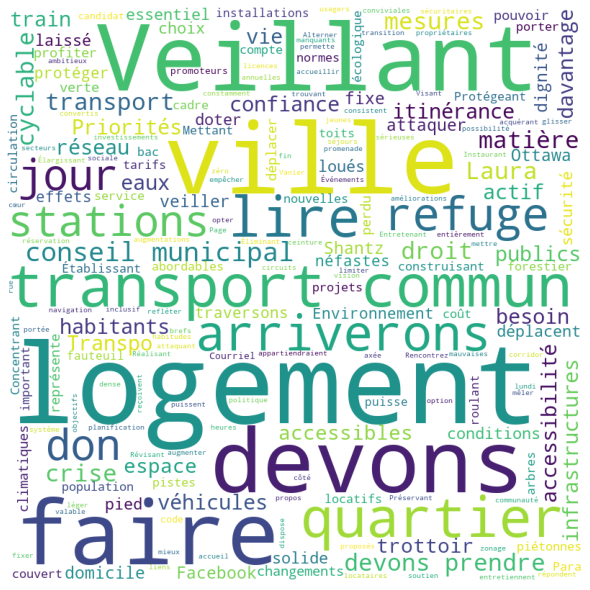

fiala


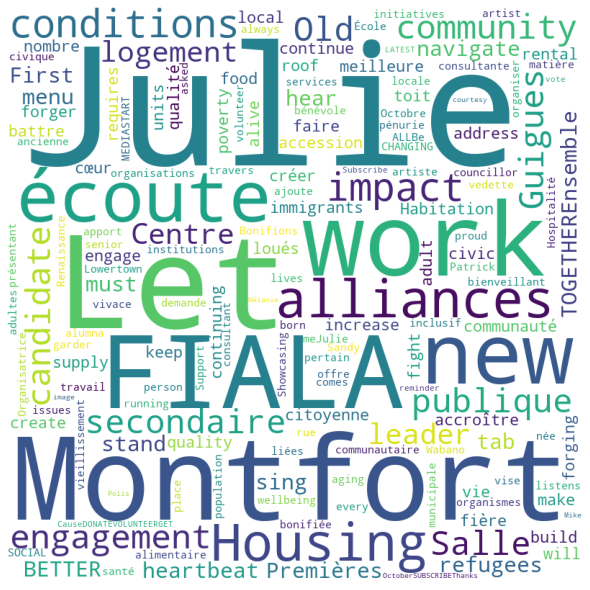

shantz_en


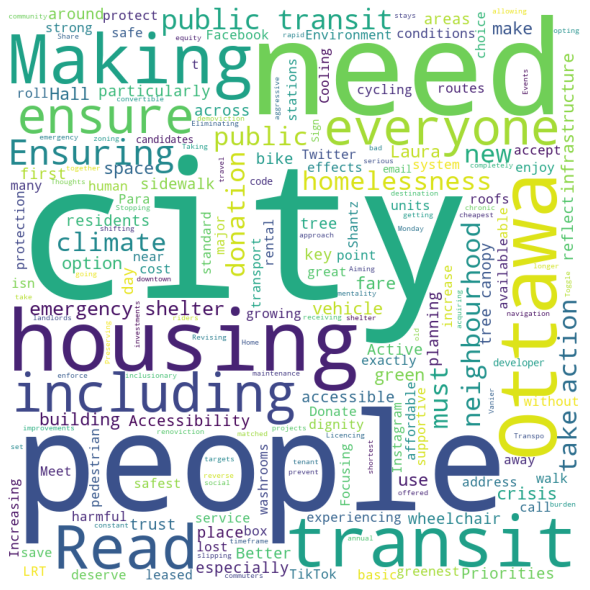

In [7]:
# go through each line of the file and make a wordclloud
for i, row in data.iterrows():
    language = row['language']
    save_name = row['save_name']
    print(save_name)
    # get the website
    page = requests.get(row['url'])
    # parse 
    soup = BeautifulSoup(page.text, 'html.parser')
    text = soup.get_text()
    words = ""
    wordlist = []
    
    # iterate through the text and extract words
    for line in text.split('\n'):
        if len(line) < 2:
            continue
        for word in line.split(' '):
            #print(word)
            #word = word.strip()
            if word == "":
                continue
            #print(word)
            if len(word) > max_len:
                continue
            if len(word) < min_len:
                continue
            # skip words with punctuation
            check = False
            for p in list(string.punctuation):
                if p in word:
                    check = True
            if check == True:
                continue
            # skip words that don't have an ascii letter in them
            letter_check = False
            for l in string.ascii_letters:
                if l in word:
                    letter_check = True
                    break
            if letter_check == False:
                continue

            words += " "
            words += word
            wordlist.append(word)
    
    if language == 'fr':
        stopwords = stopwords_fr
    elif language == 'en':
        stopwords = stopwords_en
    elif language == 'all':
        stopwords = stopwords_fr.union(stopwords_en)
        
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.savefig("%s.png" %save_name, dpi = 300)
    plt.show()
    plt.close()